In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'datasets/train'
valid_path = 'datasets/test'

In [3]:
inception = InceptionV3(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# layers - add more if you want
x = Flatten()(inception.output)

In [7]:
prediction = Dense(len(folders), activation = 'softmax')(x)

# create a model object
model = Model(inputs = inception.input, outputs = prediction)

In [8]:
# loss function and optimizer
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [11]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [12]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 51s 837ms/step - loss: 2.2645 - accuracy: 0.7427 - val_loss: 0.1874 - val_accuracy: 0.8889
Epoch 2/20
61/61 [==============================] - 49s 807ms/step - loss: 0.6286 - accuracy: 0.8872 - val_loss: 1.2711 - val_accuracy: 0.7222
Epoch 3/20
61/61 [==============================] - 50s 812ms/step - loss: 0.7485 - accuracy: 0.8965 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 49s 811ms/step - loss: 0.5264 - accuracy: 0.9241 - val_loss: 0.1484 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 49s 810ms/step - loss: 0.4395 - accuracy: 0.9272 - val_loss: 0.7936 - val_accuracy: 0.8333
Epoch 6/20
61/61 [==============================] - 50s 814ms/step - loss: 0.6465 - accuracy: 0.9159 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 49s 806ms/step

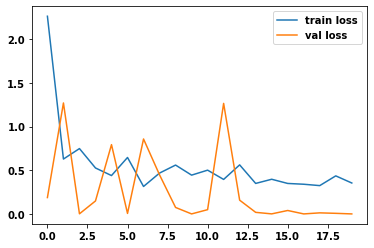

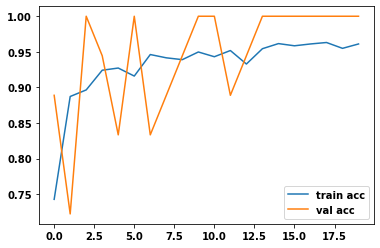

In [13]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [14]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')